In [27]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv"
df = pd.read_csv(dataset)
# just renaming the columns for when we merge the data, inplace so i dont have to redefine the df

# df.set_index("dateRep", inplace=True)

# Taking only the columns we want
df = df[["dateRep", "cases", "deaths", "countriesAndTerritories", "continentExp"]]
df["dateRep"]= pd.to_datetime(df["dateRep"]) # Changing the date format of the dateRep column.
df

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,2020-12-14,746,6,Afghanistan,Asia
1,2020-12-13,298,9,Afghanistan,Asia
2,2020-12-12,113,11,Afghanistan,Asia
3,2020-12-11,63,10,Afghanistan,Asia
4,2020-12-10,202,16,Afghanistan,Asia
...,...,...,...,...,...
61895,2020-03-25,0,0,Zimbabwe,Africa
61896,2020-03-24,0,1,Zimbabwe,Africa
61897,2020-03-23,0,0,Zimbabwe,Africa
61898,2020-03-22,1,0,Zimbabwe,Africa


In [29]:
# Retrieving the correct columns between the dates of March 1st 2020 till May 31st 2020.
start_date = '2020-03-01'
end_date = '2020-10-31'

df_NZL = df[(df['countriesAndTerritories'] == 'New_Zealand') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
df_IND = df[(df['countriesAndTerritories'] == 'India') & ((df['dateRep'] >= '2020-03-01') & (df['dateRep'] <= '2020-05-31'))]

df_HRV = df[(df['countriesAndTerritories'] == 'Croatia') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
df_SEN = df[(df['countriesAndTerritories'] == 'Senegal') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]

df_SWE = df[(df['countriesAndTerritories'] == 'Sweden') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
df_BRA = df[(df['countriesAndTerritories'] == 'Brazil') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]

In [30]:
# df_NZL
# df_IND
# df_HRV
# df_SEN
# df_SWE
# df_BRA

# Objective 2
Predicting if a country underwent a lockdown or not based on the infection and death cases over a period of time.

### Polynomial regression for New Zealand

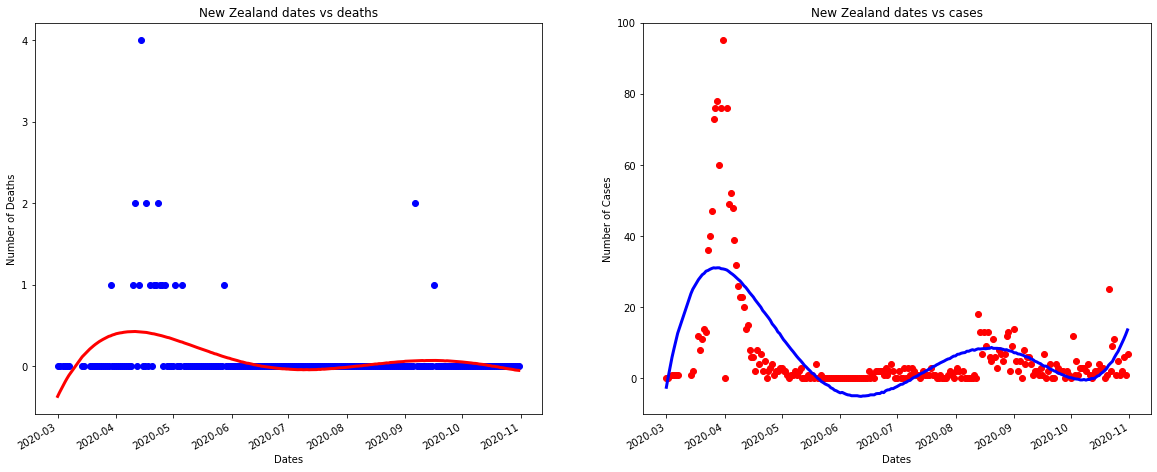

In [31]:
# Polynomial regression for New Zealand
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
x_copy = np.array(df_NZL['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_NZL['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_NZL['deaths'])

poly_NZL = PolynomialFeatures(degree=6)
x_poly_NZL = poly_NZL.fit_transform(x)

model_NZL = LinearRegression()
model_NZL.fit(x_poly_NZL, y)
y_poly_NZL = model_NZL.predict(x_poly_NZL)

plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.title("New Zealand dates vs deaths")
plt.scatter(x_copy,y, color='blue')
plt.plot(x_copy, y_poly_NZL, color='red', linewidth=3)
plt.gcf().autofmt_xdate()


# Polynomial regression for date vs cases
plt.subplot(1,2,2)

x_copy = np.array(df_NZL['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_NZL['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_NZL['cases'])

poly_NZL = PolynomialFeatures(degree=6)
x_poly_NZL = poly_NZL.fit_transform(x)

model_NZL = LinearRegression()
model_NZL.fit(x_poly_NZL, y)
y_poly_NZL = model_NZL.predict(x_poly_NZL)

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("New Zealand dates vs cases")
plt.scatter(x_copy,y, color='red')
plt.plot(x_copy, y_poly_NZL, color='blue', linewidth=3)
plt.gcf().autofmt_xdate()

### Polynomial regression for India

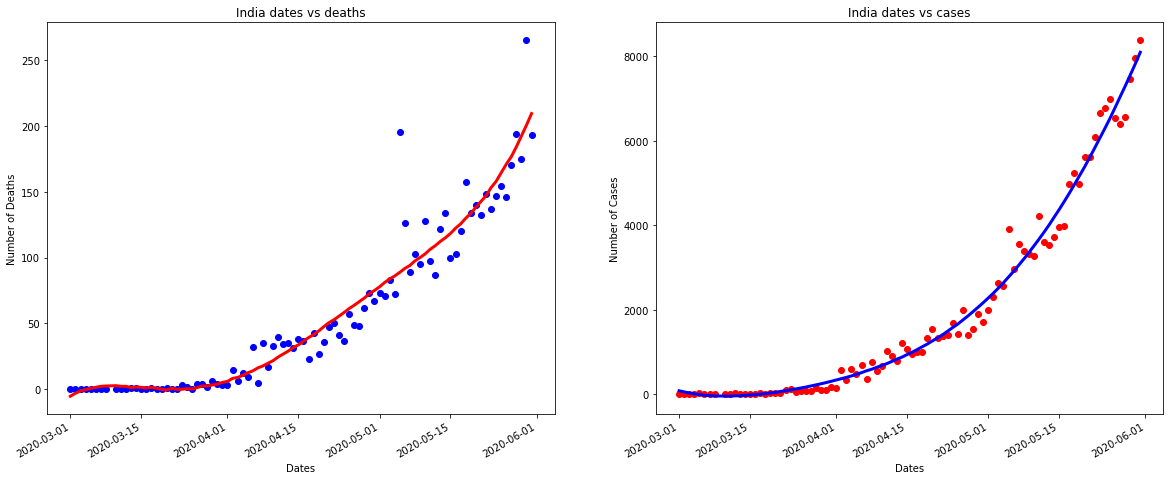

In [32]:
# Polynomial regression for India
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
x_copy = np.array(df_IND['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_IND['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_IND['deaths'])

poly_IND = PolynomialFeatures(degree=6)
x_poly_IND = poly_IND.fit_transform(x)

model_IND = LinearRegression()
model_IND.fit(x_poly_IND, y)
y_poly_IND = model_IND.predict(x_poly_IND)

plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.title("India dates vs deaths")
plt.scatter(x_copy,y, color='blue')
plt.plot(x_copy, y_poly_IND, color='red', linewidth=3)
plt.gcf().autofmt_xdate()


# Polynomial regression for date vs cases
plt.subplot(1,2,2)

x_copy = np.array(df_IND['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_IND['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_IND['cases'])

poly_IND = PolynomialFeatures(degree=6)
x_poly_IND = poly_IND.fit_transform(x)

model_IND = LinearRegression()
model_IND.fit(x_poly_IND, y)
y_poly_IND = model_IND.predict(x_poly_IND)

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("India dates vs cases")
plt.scatter(x_copy,y, color='red')
plt.plot(x_copy, y_poly_IND, color='blue', linewidth=3)
plt.gcf().autofmt_xdate()

### Polynomial regression for Croatia

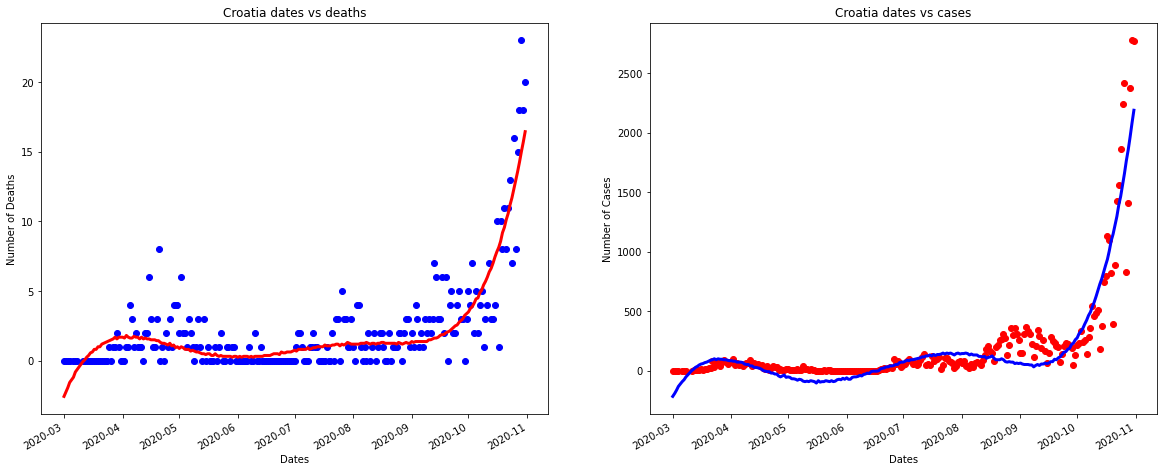

In [33]:
# Polynomial regression for Croatia
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
x_copy = np.array(df_HRV['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_HRV['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_HRV['deaths'])

poly_HRV = PolynomialFeatures(degree=6)
x_poly_HRV = poly_HRV.fit_transform(x)

model_HRV = LinearRegression()
model_HRV.fit(x_poly_HRV, y)
y_poly_HRV = model_HRV.predict(x_poly_HRV)

plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.title("Croatia dates vs deaths")
plt.scatter(x_copy,y, color='blue')
plt.plot(x_copy, y_poly_HRV, color='red', linewidth=3)
plt.gcf().autofmt_xdate()


# Polynomial regression for date vs cases
plt.subplot(1,2,2)

x_copy = np.array(df_HRV['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_HRV['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_HRV['cases'])

poly_HRV = PolynomialFeatures(degree=6)
x_poly_HRV = poly_HRV.fit_transform(x)

model_HRV = LinearRegression()
model_HRV.fit(x_poly_HRV, y)
y_poly_HRV = model_HRV.predict(x_poly_HRV)

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("Croatia dates vs cases")
plt.scatter(x_copy,y, color='red')
plt.plot(x_copy, y_poly_HRV, color='blue', linewidth=3)
plt.gcf().autofmt_xdate()

### Polynomial regression for Senegal

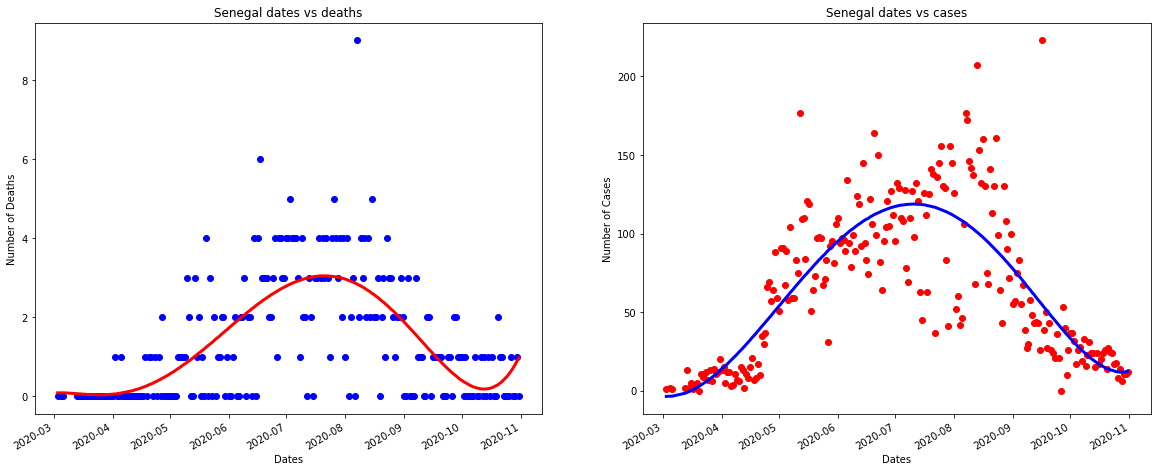

In [34]:
# Polynomial regression for Senegal
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
x_copy = np.array(df_SEN['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_SEN['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SEN['deaths'])

poly_SEN = PolynomialFeatures(degree=6)
x_poly_SEN = poly_SEN.fit_transform(x)

model_SEN = LinearRegression()
model_SEN.fit(x_poly_SEN, y)
y_poly_SEN = model_SEN.predict(x_poly_SEN)

plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.title("Senegal dates vs deaths")
plt.scatter(x_copy,y, color='blue')
plt.plot(x_copy, y_poly_SEN, color='red', linewidth=3)
plt.gcf().autofmt_xdate()


# Polynomial regression for date vs cases
plt.subplot(1,2,2)

x_copy = np.array(df_SEN['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_SEN['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SEN['cases'])

poly_SEN = PolynomialFeatures(degree=6)
x_poly_SEN = poly_SEN.fit_transform(x)

model_SEN = LinearRegression()
model_SEN.fit(x_poly_SEN, y)
y_poly_SEN = model_SEN.predict(x_poly_SEN)

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("Senegal dates vs cases")
plt.scatter(x_copy,y, color='red')
plt.plot(x_copy, y_poly_SEN, color='blue', linewidth=3)
plt.gcf().autofmt_xdate()

### Polynomial regression for Sweden

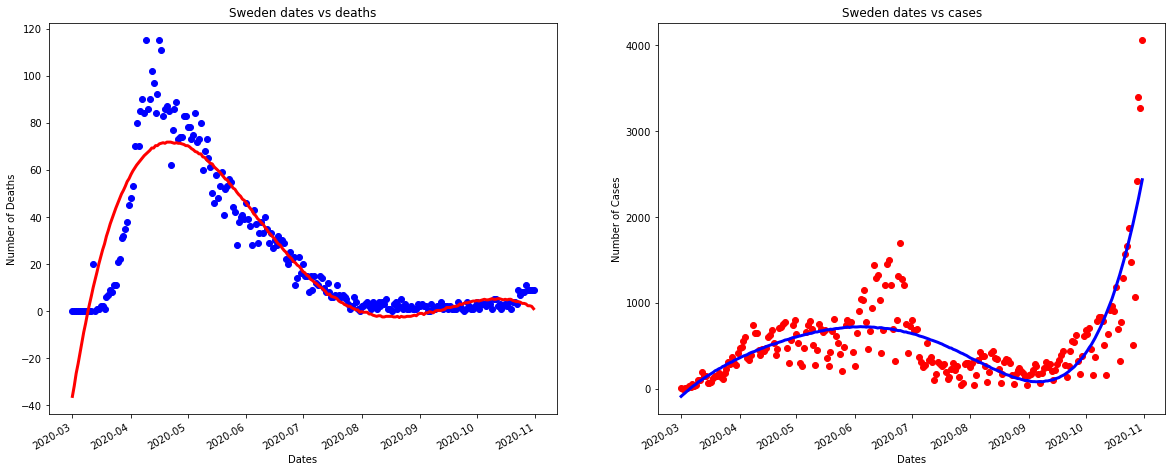

In [35]:
# Polynomial regression for Sweden
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
x_copy = np.array(df_SWE['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_SWE['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SWE['deaths'])

poly_SWE = PolynomialFeatures(degree=6)
x_poly_SWE = poly_SWE.fit_transform(x)

model_SWE = LinearRegression()
model_SWE.fit(x_poly_SWE, y)
y_poly_SWE = model_SWE.predict(x_poly_SWE)

plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.title("Sweden dates vs deaths")
plt.scatter(x_copy,y, color='blue')
plt.plot(x_copy, y_poly_SWE, color='red', linewidth=3)
plt.gcf().autofmt_xdate()


# Polynomial regression for date vs cases
plt.subplot(1,2,2)

x_copy = np.array(df_SWE['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_SWE['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SWE['cases'])

poly_SWE = PolynomialFeatures(degree=6)
x_poly_SWE = poly_SWE.fit_transform(x)

model_SWE = LinearRegression()
model_SWE.fit(x_poly_SWE, y)
y_poly_SWE = model_SWE.predict(x_poly_SWE)

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("Sweden dates vs cases")
plt.scatter(x_copy,y, color='red')
plt.plot(x_copy, y_poly_SWE, color='blue', linewidth=3)
plt.gcf().autofmt_xdate()

### Polynomial regression for Brazil

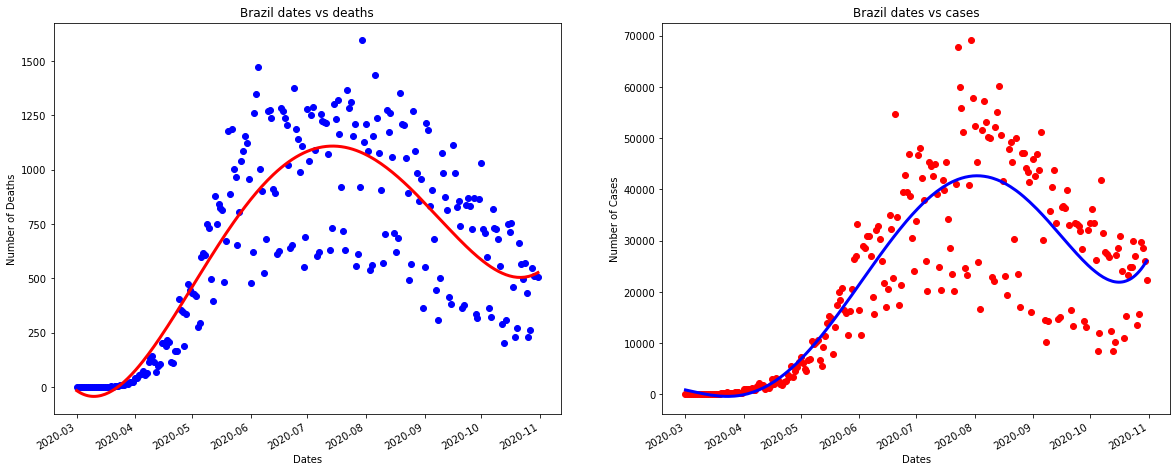

In [36]:
# Polynomial regression for Brazil
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
x_copy = np.array(df_BRA['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_BRA['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_BRA['deaths'])

poly_BRA = PolynomialFeatures(degree=4)
x_poly_BRA = poly_BRA.fit_transform(x)

model_BRA = LinearRegression()
model_BRA.fit(x_poly_BRA, y)
y_poly_BRA = model_BRA.predict(x_poly_BRA)

plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.title("Brazil dates vs deaths")
plt.scatter(x_copy,y, color='blue')
plt.plot(x_copy, y_poly_BRA, color='red', linewidth=3)
plt.gcf().autofmt_xdate()


# Polynomial regression for date vs cases
plt.subplot(1,2,2)

x_copy = np.array(df_BRA['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_BRA['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_BRA['cases'])

poly_BRA = PolynomialFeatures(degree=6)
x_poly_BRA = poly_BRA.fit_transform(x)

model_BRA = LinearRegression()
model_BRA.fit(x_poly_BRA, y)
y_poly_BRA = model_BRA.predict(x_poly_BRA)

plt.xlabel("Dates")
plt.ylabel("Number of Cases")
plt.title("Brazil dates vs cases")
plt.scatter(x_copy,y, color='red')
plt.plot(x_copy, y_poly_BRA, color='blue', linewidth=3)
plt.gcf().autofmt_xdate()